# Assignment 10 - PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SFBay_no_NaN.csv')
data.head()

chl  dox  spm    sal   temp
0  2.1  9.0   53  17.90  11.54
1  2.2  9.0   53  17.90  11.54
2  2.2  9.1   53  17.90  11.54
3  2.2  9.1   53  17.91  11.56
4  2.3  9.1   66  18.08  11.61

## Part 1 - data standardization

In [3]:
std = data.std()
mean = data.mean()

In [4]:
ds = pd.DataFrame() # the standardized dataframe

ds['chl_s'] = (data.chl - mean.chl)/std.chl
ds['dox_s'] = (data.dox - mean.dox)/std.dox
ds['spm_s'] = (data.spm - mean.spm)/std.spm
ds['sal_s'] = (data.sal - mean.sal)/std.sal
ds['temp_s'] = (data.temp - mean.temp)/std.temp
ds.head()

chl_s     dox_s     spm_s     sal_s    temp_s
0 -0.482979  0.707405  0.336086 -1.045590 -1.191767
1 -0.475387  0.707405  0.336086 -1.045590 -1.191767
2 -0.475387  0.788405  0.336086 -1.045590 -1.191767
3 -0.475387  0.788405  0.336086 -1.043846 -1.185441
4 -0.467795  0.788405  0.575199 -1.014197 -1.169624

## Part 2 - perform PCA

In [5]:
n_modes = np.min(np.shape(ds))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(ds)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

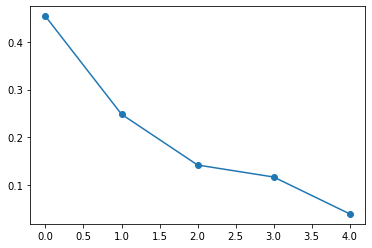

In [6]:
plt.plot(fracVar, marker='o')

In [7]:
cov = pca.get_covariance()
cov

array([[ 1.        ,  0.50799481,  0.36310213, -0.30294494, -0.06711328],
       [ 0.50799481,  1.        , -0.00784197, -0.5645559 , -0.5652737 ],
       [ 0.36310213, -0.00784197,  1.        , -0.209937  ,  0.01983562],
       [-0.30294494, -0.5645559 , -0.209937  ,  1.        ,  0.33653926],
       [-0.06711328, -0.5652737 ,  0.01983562,  0.33653926,  1.        ]])

### will keep the first two modes <br>

# Part 3 - Interpret the first two modes

Text(0.5, 1.0, 'PC - mode 2')

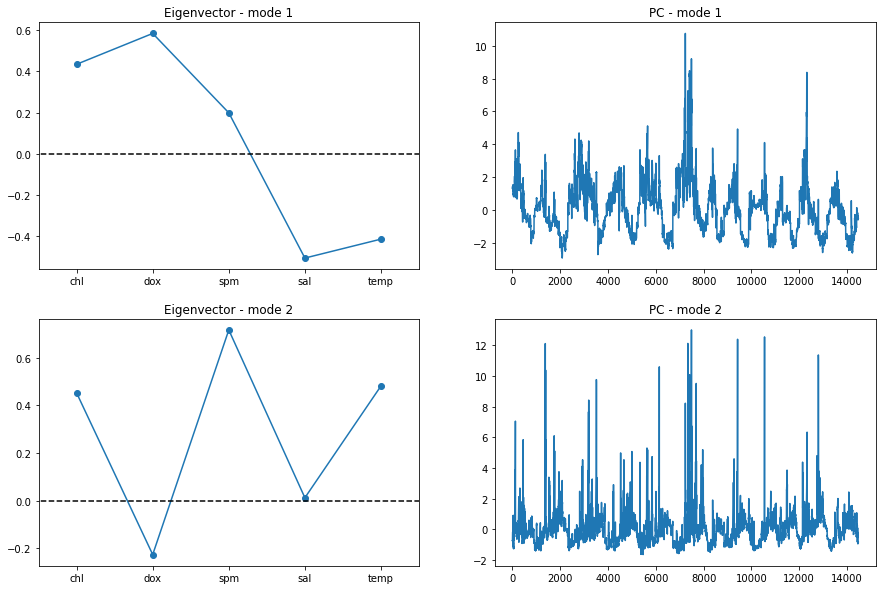

In [8]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(eigvecs[0,:], marker='o')
ax[0,0].set_xticks([0,1,2,3,4])
ax[0,0].set_xticklabels(['chl','dox','spm','sal','temp'])
ax[0,0].set_title('Eigenvector - mode 1')
ax[0,0].plot([-1,5],[0,0],'k--')
ax[0,0].set_xlim([-0.5,4.5])

ax[1,0].plot(eigvecs[1,:], marker='o')
ax[1,0].set_xticks([0,1,2,3,4])
ax[1,0].set_xticklabels(['chl','dox','spm','sal','temp'])
ax[1,0].set_title('Eigenvector - mode 2')
ax[1,0].plot([-1,5],[0,0],'k--')
ax[1,0].set_xlim([-0.5,4.5])

ax[0,1].plot(PCs[:,0])
ax[0,1].set_title('PC - mode 1')

ax[1,1].plot(PCs[:,1])
ax[1,1].set_title('PC - mode 2')

### Interpretation of what may be causing these modes <br>

The data analysed here is from stations in the south of San Fransico Bay - a protected bay connected to the Pacific Ocean through the Golden Gate channel and fed freshwater via the Sacramento River. <br>

I believe that mode 1 is caused by annual discharge events from the Sacramento River in the spring. Based on the PC of mode one this eigenvector increases and decreases in strength about once per year, aligning with high river discharge in the spring and low in the fall. This spring flow of water would be both cold and fresh, which alligns with the eigenvector of mode 1 which shows that the salinity and temperature variables have a similar signal in this mode. It also makes sense for the chlorofyl and dissolved oxygen to have the opposite signal. The chlorophyl bloom typically happens in the spring (at the same time that the high river flow occurs) due to warmer and calmer weather. Chlorophyl undergoes photosynthesis so will directly link to higher oxygen levels in the water while its levels are high. The river flow will also bring in a flux of suspended sediment into the bay, explaing why the suspended particulate matter content in the bay would increase with the chlorophyll and oxygen. <br>

The cause of mode 2 is less immediately clear. If the positive signal of mode 1 peaks in the spring then based on the PC 2 timeseries it looks like mode 2 peaks only shortly after, likely in the summer. I believe that mode two is caused by the warming of the surface layer of the bay in the summer and the cooling of the surface layer in the winter. Focusing on the summer as it is the stronger part of the signal, the warming of the surface layer would obviously increase the temperature, but it also would have no impact on the salinity, and would decrease the dissolved oxygen content in the water. It also makes sense the chlorophyll remains hign in the summer in the bay due to the continues warm and calm conditions ideal for phytoplankton to grow. Combined modes 1 and 2 show that chlorophyll will be high in the spring and summer and low in the fall and winter. Why the suspended particulate matter is so high in the bay in the summer is less clear and would likely take a deeper knowledge of the flows in the bay to understand. 